# Проект SQL

В период коронавируса варианты досуга стали ограниченными, люди реже стали выходить на улицу и стали чаще читать. В результате резко повысилась популярность сервисов для чтения книг, компании решили ответить на запрос и активно начали создавать книжные приложения. Наша компания также решила присоединиться к общему тренду.

Цель - проанализировать базу данных сервиса для чтения книг, приобретенного компанией.

Прежде чем анализировать базу данных, нам необходимо выгрузить данные и исследовать их.

Задачи:
1. Посчитать, сколько книг вышло после 1 января 2000 года;
2. Посчитать количество обзоров и среднюю оценку для каждой книги;
3. Определить издательство, которое выпустило больше всего книг;
4. Определить автора с самой высокой оценкой;
5. Посчитать среднее количество обзоров от пользователей поставивших больше 50 оценок.

В нашем распоряжении имеется база данных, которая состоит из пяти таблиц.

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

### Связи между таблицами приведены ниже:

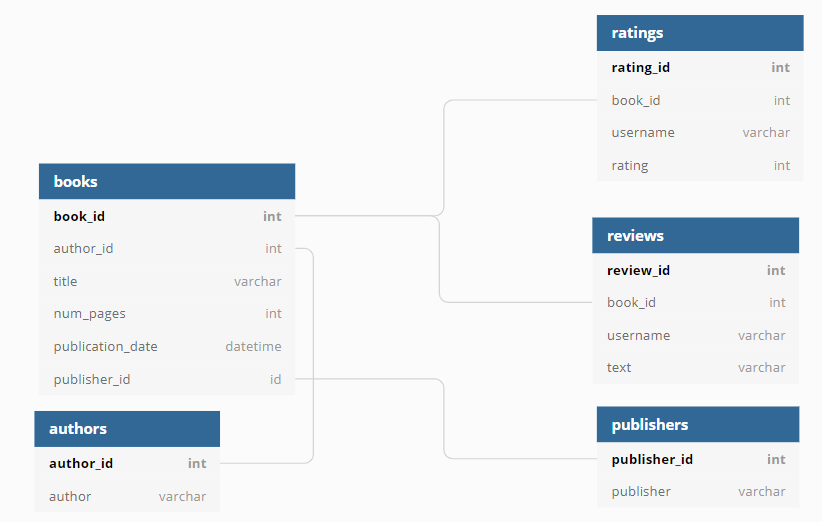

## Исследование данных

Подключаем библиотеки и подключаемся к базе данных.

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Напишем запросы, с помощью которых выведем содержимое таблиц.

In [4]:
for i in ['books','authors', 'publishers','ratings','reviews']:
    query = '''SELECT * 
               FROM {};'''.format(i)
    data = pd.io.sql.read_sql(query, con = engine).head()
    print('Информация о таблице {}'.format(i))
    display(data.head())
    print()
    print(data.info())
    print()


Информация о таблице books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes
None

Информация о таблице authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None

Информация о таблице publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  5 non-null      int64 
 1   publisher     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None

Информация о таблице ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   rating     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes
None

Информация о таблице reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   text       5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None



В таблице содержится информация о тысяче книг.

Данные представлены о 636 авторах.

Всего 340 издательств.

Поставлено около 6,5 тыс. оценок.

Пользователями написано примерно 2,8 тыс. обзоров.

Итак, в данных содердится информация о тысяче книг, 636 авторах и 340 издательствах. Книги были оценены около 6,5 тыс. раз и было сделано около 2,8 тыс. обзоров.

# Задача 1. Определить количество книг, вышедших после 1 января 2000 года.

Посчитаем количество книг, выпущенных после 1 января 2000 года.

In [9]:
query_1 = '''SELECT COUNT(book_id)
            FROM books
            WHERE publication_date > '2000-01-01'
            '''
data_1 = pd.io.sql.read_sql(query_1, con = engine)
data_1.columns = ['Количество книг']
data_1

,Количество книг
0,819


В базе имеется 819 книг, выпущенных после 1 января 2000 года. Напомню, что в базе всего тысяча книг, а значит, что это подавляющее большинство.

# Задача 2. Определить количество обзоров и среднюю оценку для каждой книги.

Для каждой книги посчитаем количество обзоров и среднюю оценку.

In [10]:
query_2 = '''
            WITH cnt_rvs AS
            (SELECT book_id, COUNT(review_id) cnt_reviews
            FROM reviews
            GROUP BY book_id),
            mean_rts AS
            (SELECT book_id, AVG(rating) mean_rating
            FROM ratings
            GROUP BY book_id)
            SELECT b.book_id, b.title, cr.cnt_reviews, mr.mean_rating
            FROM books AS b
            LEFT JOIN cnt_rvs AS cr ON b.book_id = cr.book_id
            LEFT JOIN mean_rts AS mr ON b.book_id = mr.book_id
            ORDER BY cr.cnt_reviews DESC
            '''
by_book = pd.io.sql.read_sql(query_2, con = engine)
by_book.columns = ['ID','Название книги', 'Количество обзоров', 'Средний рейтинг']
by_book.sort_values(by='Количество обзоров', ascending = False).head()

,ID,Название книги,Количество обзоров,Средний рейтинг
6,948,Twilight (Twilight #1),7.0,3.662500
15,733,The Giver (The Giver #1),6.0,3.750000
7,627,The Alchemist,6.0,3.789474
20,695,The Curious Incident of the Dog in the Night-Time,6.0,4.081081
19,207,Eat Pray Love,6.0,3.395833


В данных есть книги, которые получили рейтинг 5, но у них всего одно ревью. Есть книги, на которые вообще нет обзоров. Больше всего обзоров собирают такие бестселлеры как Сумерки (1 место по ревью), Воровка книг, Чужестранка и прочие.

In [11]:
by_book.sort_values(by=['Средний рейтинг','Количество обзоров'], ascending=False).head(10)

,ID,Название книги,Количество обзоров,Средний рейтинг
123,17,A Dirty Job (Grim Reaper #1),4.0,5.0
333,444,Moneyball: The Art of Winning an Unfair Game,3.0,5.0
414,553,School's Out—Forever (Maximum Ride #2),3.0,5.0
523,938,Triptych (Will Trent #1),2.0,5.0
530,20,A Fistful of Charms (The Hollows #4),2.0,5.0
535,76,Angels Fall,2.0,5.0
562,913,The Woman in Black,2.0,5.0
573,224,Evening Class,2.0,5.0
575,86,Arrows of the Queen (Heralds of Valdemar #1),2.0,5.0
592,469,Neil Gaiman's Neverwhere,2.0,5.0


По соотношению количество обзоров-оценка, наиболее популярной оказалась книга "Гразная работа".

# Задача 3. Определить издательство, которое выпустило наибольшее число книг.

Определим издательство, которое выпустило больше всего книг.

In [13]:
query_3 = '''
            SELECT p.publisher, b.publisher_id, COUNT(b.book_id) cnt_books
            FROM books b
            JOIN publishers p ON b.publisher_id = p.publisher_id
            WHERE num_pages > 50
            GROUP BY p.publisher, b.publisher_id
            ORDER BY cnt_books DESC
            LIMIT 1
            '''
data_3 = pd.io.sql.read_sql(query_3, con = engine)
data_3.columns = ['Издатель', 'ID','Количество книг']
data_3

,Издатель,ID,Количество книг
0,Penguin Books,212,42


Самым плодотворным издательством стало издательство Penguin Books. Это британское издательство, которое выпустило книги Эрнеста Хемингуэя и Агаты Кристи.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Издательство опредили верно! Спасибо, что дополнительно выведено количество книг издательства:)

</div>

# Задача 4. Определить автора с самой высокой средней оценкой книг.

Определим автора с самой высокой средней оценкой книг.

In [14]:
query_4 = '''
            WITH rating_by_book AS
            (SELECT book_id, AVG(rating) avg_raiting
            FROM ratings
            GROUP BY book_id
            HAVING COUNT(rating_id) >= 50
            ORDER BY AVG(rating) DESC)
            SELECT author, AVG(rb.avg_raiting)
            FROM books b
            JOIN authors a ON b.author_id = a.author_id
            JOIN rating_by_book rb ON b.book_id = rb.book_id
            GROUP BY author
            ORDER BY AVG(rb.avg_raiting) DESC
            LIMIT 1
            '''
data_4 = pd.io.sql.read_sql(query_4, con = engine)
data_4.columns = ['Автор', 'Средняя оценка']
data_4

,Автор,Средняя оценка
0,J.K. Rowling/Mary GrandPré,4.283844


Самые высокие оценки ставят книгам Джоан Роулинг. Писательница написала популярную серию книг о Гарри Поттере.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Автор с самым высоким средним рейтингом найден верно! Классно, что дополнительно выведен сам средний рейтинг - именно в его расчёте обычно делают ошибки:)

</div>

# Задача 5. Определить среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

Посчитаем среднее количество обзоров от наиболее активных пользователей.

In [15]:
query_5 = '''
            WITH 
            num_reviews AS
            (SELECT username, COUNT(review_id) cnt_reviews
            FROM reviews
            WHERE username IN
            (
            SELECT username
            FROM ratings
            GROUP BY username
            HAVING COUNT(rating_id)>50
            )
            GROUP BY username)
            SELECT AVG(cnt_reviews)
            FROM num_reviews nrv
            '''
data_5 = pd.io.sql.read_sql(query_5, con = engine)
data_5.columns = ['Среднее количество обзоров']
data_5

,Среднее количество обзоров
0,24.333333


Наиболее активные пользователи в среднем оставили чуть менее 25 обзоров.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Ответ получился смещённым, так как в итоговом запросе ты делаешь `JOIN` вместо фильтрации нужных пользователей из подзапроса: так как агрегация происходит уже после `JOIN`, то в расчёт итоговой метрики попадают лишние пользователи - их нужно фильтровать до агрегации.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправила.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

# Выводы по результатам исследования

В данных содердится информация о тысяче книг, 636 авторах и 340 издательствах. Книги были оценены около 6,5 тыс. раз и было сделано около 2,8 тыс. обзоров.

Мы выяснили, что с 1 января 2000 года было выпущено более 800 книг. Что касается рейтинга, то топовой книгой, по соотношению количества обзоров и оценки, оказалась "Граязная работа". Больше всего обзоров получили "Сумерки", "Воровка книг" и "Чужестранка".
В базе больше всего книг издательства Penguin Books - 42 книги, а наиболее высокие оценки получают книги Джоан Роулинг - 4,28. В среднем наиболее активные пользователи оставляют чуть меньше 25 обзоров.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный итоговый вывод по проекту!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не забудь скорректировать метрики в выводе.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправила.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Валерия, отличная работа над проектом - почти все задания у тебя выполнены верно!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
SQL запросы написаны хорошо и оптимально, в них нет избыточных действий, они возвращают верный результат - это здорово, кажется, тебе удалось здорово разобраться в теме.
    
Есть небольшие рекомендации по улучшению проекта - некритичная мелочь, которая не займёт много времени, но сделает твой проект стилистически более совершенным. Будет классно, если эти рекомендации будут учтены в твоей работе:)
    
К нескольким заданиям стоит вернуться - к ним я оставил комментарии красного цвета с пояснениями внутри. Думаю, ты быстро разберёшься, в чём дело.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Валерия, все замечания учтены - проект принят!
    
Спасибо за работу над проектом, желаю приятного завершения выпускного модуля:)